<a href="https://colab.research.google.com/github/StevenGhow/Practicing/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2019/10/30

Kaggle - Titanic : Machine Learning from Disaster

Acc from Kaggle: 0.79425 (2192th of 13247, 17%) from random forest

In [0]:
import pandas as pd
import numpy as np

# load data
from google.colab import files
#uploaded = files.upload()

In [66]:
# load data
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# check label if imbalance
target_0 = len(train_data[train_data["Survived"] == 0])
target_1 = len(train_data[train_data["Survived"] == 1])
print("target 0:", target_0/train_data.shape[0])
print("target 1:", target_1/train_data.shape[0])

target 0: 0.6161616161616161
target 1: 0.3838383838383838


In [68]:
# check NA values in train
print(train_data.isnull().sum())
print(train_data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [69]:
# check NA values in test
print(test_data.isnull().sum())
print(test_data.shape)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 11)


In [0]:
# fill in NA in "Age"
train_data["Age"].fillna(value = train_data["Age"].mean(), inplace = True)
test_data["Age"].fillna(value = test_data["Age"].mean(), inplace = True)
test_data["Fare"].fillna(value = test_data["Fare"].mean(), inplace = True)

In [71]:
# remove "Cabin", "Name", "PassengerId", and "Ticket"
total = pd.concat([train_data, test_data], axis = 0, ignore_index = True, sort = False)
total = total.drop(columns = ["Cabin", "Name", "Ticket", "PassengerId", "Survived"])
total.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [72]:
# categorical feature: "Sex" and "Embarked"
# one hot encoding
cate_features = pd.get_dummies(total, columns = ["Sex", "Embarked", "Pclass"], drop_first = True)
cate_features.head(5)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [73]:
# SibSp + Parch to create new feature
# Acc: 0.784
 '''num_family = pd.DataFrame(cate_features["SibSp"] + cate_features["Parch"])
 num_family.columns = ["Num_Family"]
 cate_features = pd.concat([cate_features, num_family], axis = 1)
 cate_features.head(5)'''

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Num_Family
0,22.0,1,0,7.2500,1,0,1,0,1,1
1,38.0,1,0,71.2833,0,0,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,0,1,0
3,35.0,1,0,53.1000,0,0,1,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1,0


In [0]:
# split data
x_train = cate_features[:train_data.shape[0]]
y_train = train_data["Survived"]
x_test = cate_features[train_data.shape[0]:] 

In [0]:
# cross validatioin and optimaize parameters in random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# n_estimator
rf_range = range(1, 1001, 50)
rf_scores = []
for n_est in rf_range:
    rf = RandomForestClassifier(n_estimators=n_est)
    scores = cross_val_score(rf, x_train, y_train, cv=3, scoring='roc_auc')
    rf_scores.append(scores.mean())

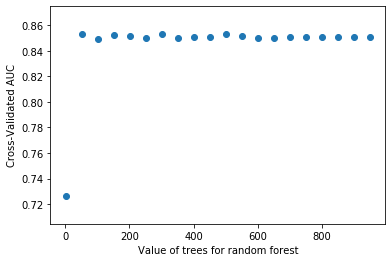

In [76]:
# assess which n_estimators is the best
import matplotlib.pyplot as plt
plt.scatter(rf_range, rf_scores)
plt.xlabel('Value of trees for random forest')
plt.ylabel('Cross-Validated AUC')
plt.show()


In [0]:
n_est = rf_scores.index(max(rf_scores)) * 50

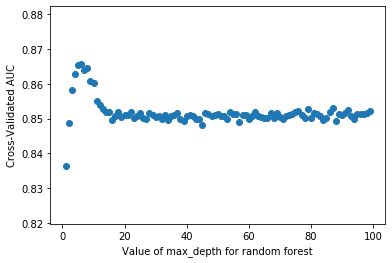

In [78]:
# max_depth
rf_range = range(1, 100, 1)
rf_scores = []
for md in rf_range:
    rf = RandomForestClassifier(n_estimators=550, max_depth = md)
    scores = cross_val_score(rf, x_train, y_train, cv=3, scoring='roc_auc')
    rf_scores.append(scores.mean())
plt.scatter(rf_range, rf_scores)
plt.xlabel('Value of max_depth for random forest')
plt.ylabel('Cross-Validated AUC')
plt.show()

In [0]:
md = rf_scores.index(max(rf_scores)) + 1

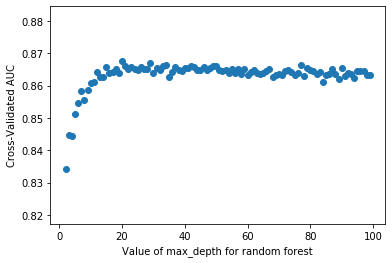

In [80]:
# max_leaf_nodes
rf_range = range(2, 100, 1)
rf_scores = []
for mln in rf_range:
    rf = RandomForestClassifier(n_estimators=550, max_depth = 8, max_leaf_nodes = mln)
    scores = cross_val_score(rf, x_train, y_train, cv=3, scoring='roc_auc')
    rf_scores.append(scores.mean())
plt.scatter(rf_range, rf_scores)
plt.xlabel('Value of max_depth for random forest')
plt.ylabel('Cross-Validated AUC')
plt.show()
mln = rf_scores.index(max(rf_scores)) + 2

In [81]:
# Acc declined
'''from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_res, y_res = ros.fit_resample(x_train, y_train)'''

'from imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler()\nx_res, y_res = ros.fit_resample(x_train, y_train)'

In [82]:
'''# model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)'''

'# model training\nfrom sklearn.linear_model import LogisticRegression\nlogistic = LogisticRegression()\nlogistic.fit(x_train, y_train)'

In [83]:
# random forest
rf = RandomForestClassifier(n_estimators = n_est, max_depth = md, max_leaf_nodes = mln)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
'''# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)'''

'# SVM\nfrom sklearn.svm import SVC\nsvm = SVC()\nsvm.fit(x_train, y_train)'

In [85]:
print(x_test)

           Age  SibSp  Parch  ...  Pclass_2  Pclass_3  Num_Family
891   34.50000      0      0  ...         0         1           0
892   47.00000      1      0  ...         0         1           1
893   62.00000      0      0  ...         1         0           0
894   27.00000      0      0  ...         0         1           0
895   22.00000      1      1  ...         0         1           2
...        ...    ...    ...  ...       ...       ...         ...
1304  30.27259      0      0  ...         0         1           0
1305  39.00000      0      0  ...         0         0           0
1306  38.50000      0      0  ...         0         1           0
1307  30.27259      0      0  ...         0         1           0
1308  30.27259      1      1  ...         0         1           2

[418 rows x 10 columns]


In [86]:
# prediction
#prediction = logistic.predict(x_test)
prediction = rf.predict(x_test)
#prediction = svm.predict(x_test)
output = {"PassengerId": np.array(test_data["PassengerId"]), 
          "Survived": prediction}
output_df = pd.DataFrame(output, columns = ["PassengerId", "Survived"])
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
output_df.to_csv("result_titanic.csv", index=0)
files.download('result_titanic.csv')